# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

C:\Users\k4kuz\AppData\Local\Temp\ipykernel_27096\3117719739.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


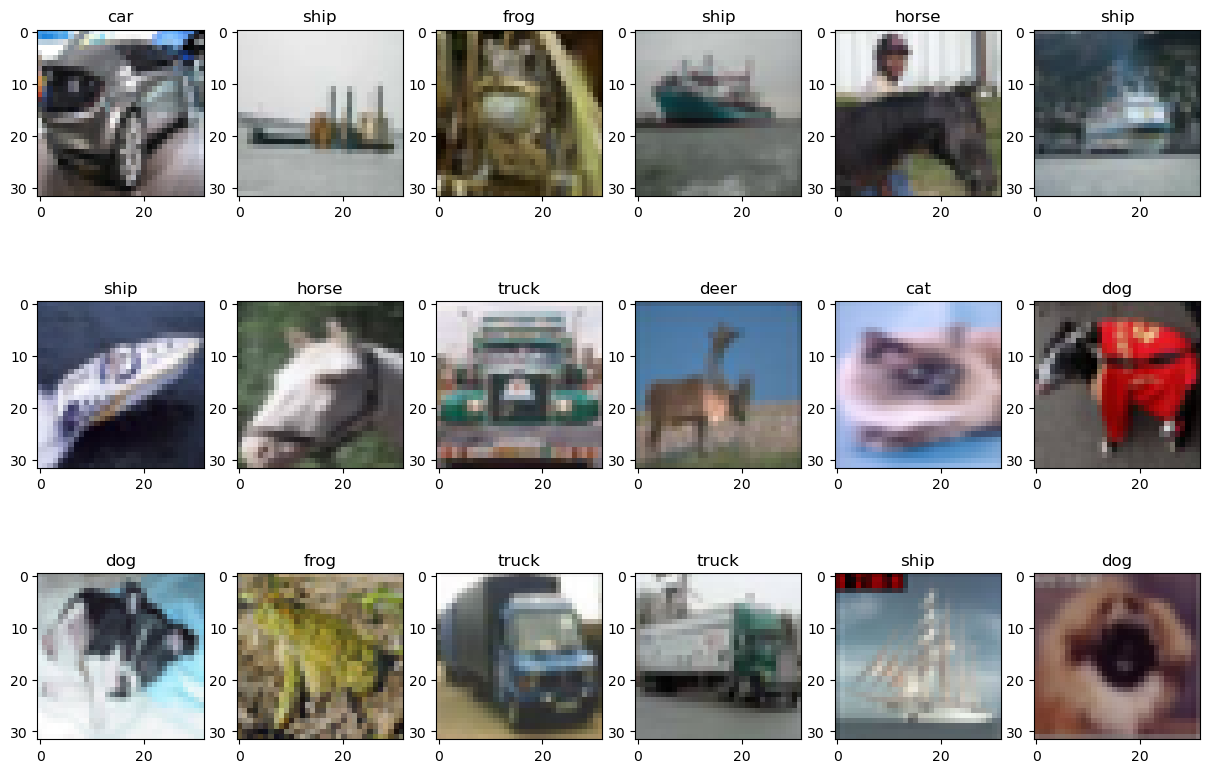

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

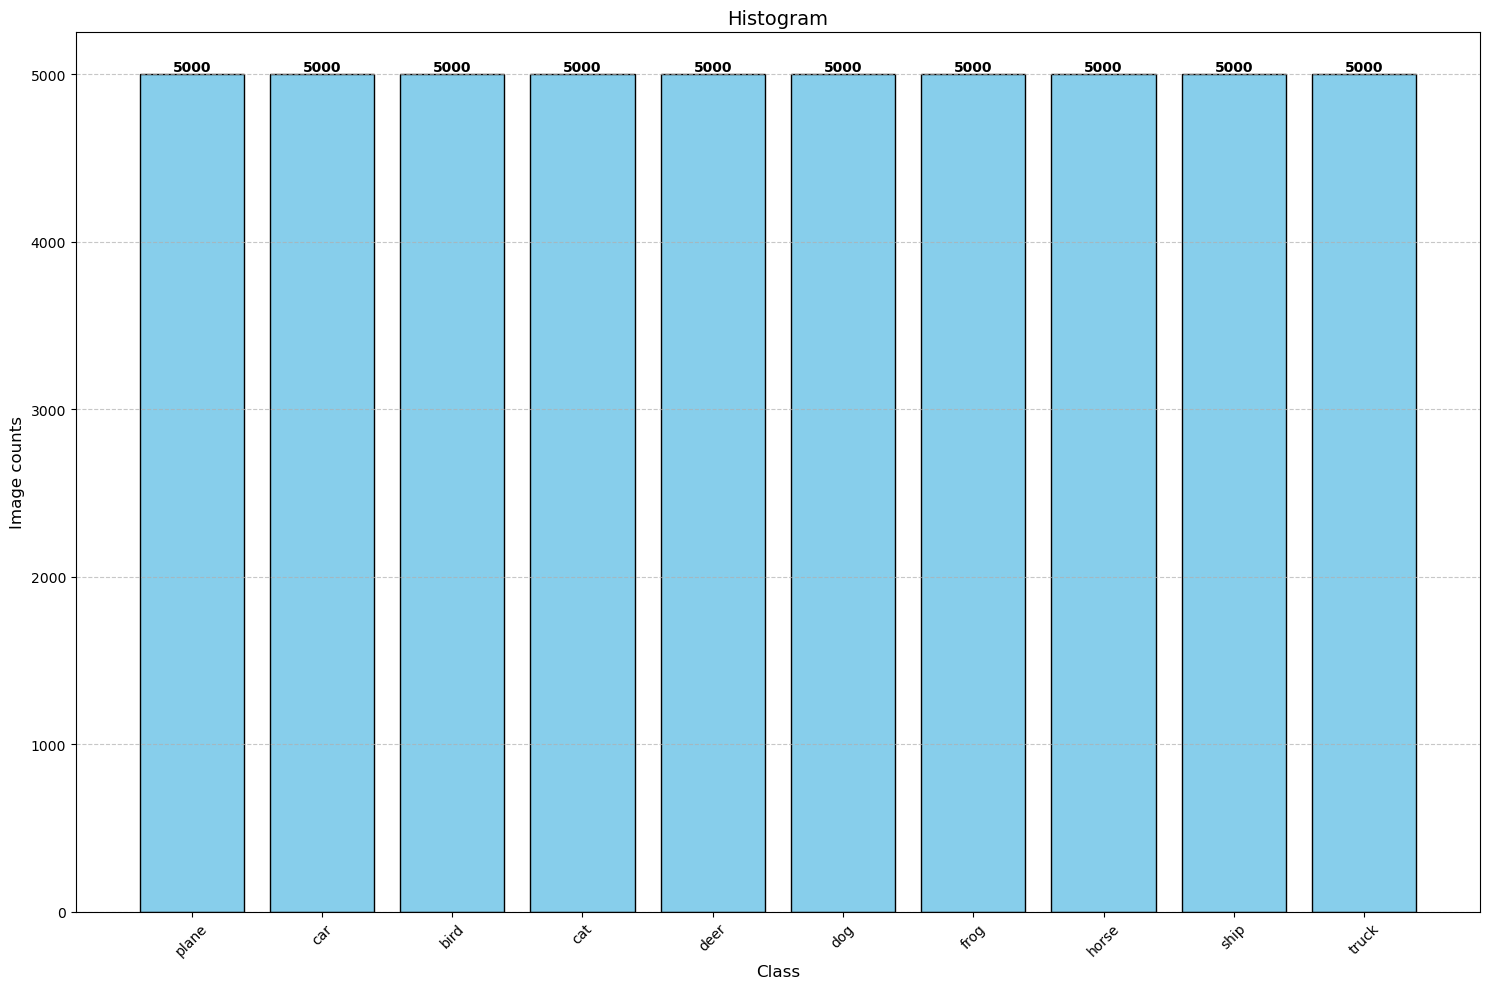

In [9]:
# Compute the class histogram
counts = np.bincount(y_train.flatten())

# Подготовка данных для осей
class_indices = list(classes.keys())
class_labels = [classes[i] for i in class_indices]

bars = plt.bar(class_labels, counts, color='skyblue', edgecolor='black')

for bar, count in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(count),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title("Histogram", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Image counts", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [10]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [44]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [45]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3960 - loss: 1.6948 - val_accuracy: 0.4780 - val_loss: 1.5053
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5250 - loss: 1.3553 - val_accuracy: 0.5574 - val_loss: 1.3013
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5714 - loss: 1.2291 - val_accuracy: 0.5978 - val_loss: 1.1702
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6000 - loss: 1.1459 - val_accuracy: 0.6224 - val_loss: 1.1043
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6218 - loss: 1.0834 - val_accuracy: 0.6394 - val_loss: 1.0629
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6404 - loss: 1.0338 - val_accuracy: 0.6496 - val_loss: 1.0296
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6560 - loss: 0.9937 - val_accuracy: 0.6566 - val_loss: 1.0067
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6683 - loss: 0.9597 - val_acc

Train Acc      0.7675555348396301
Validation Acc 0.6855999827384949


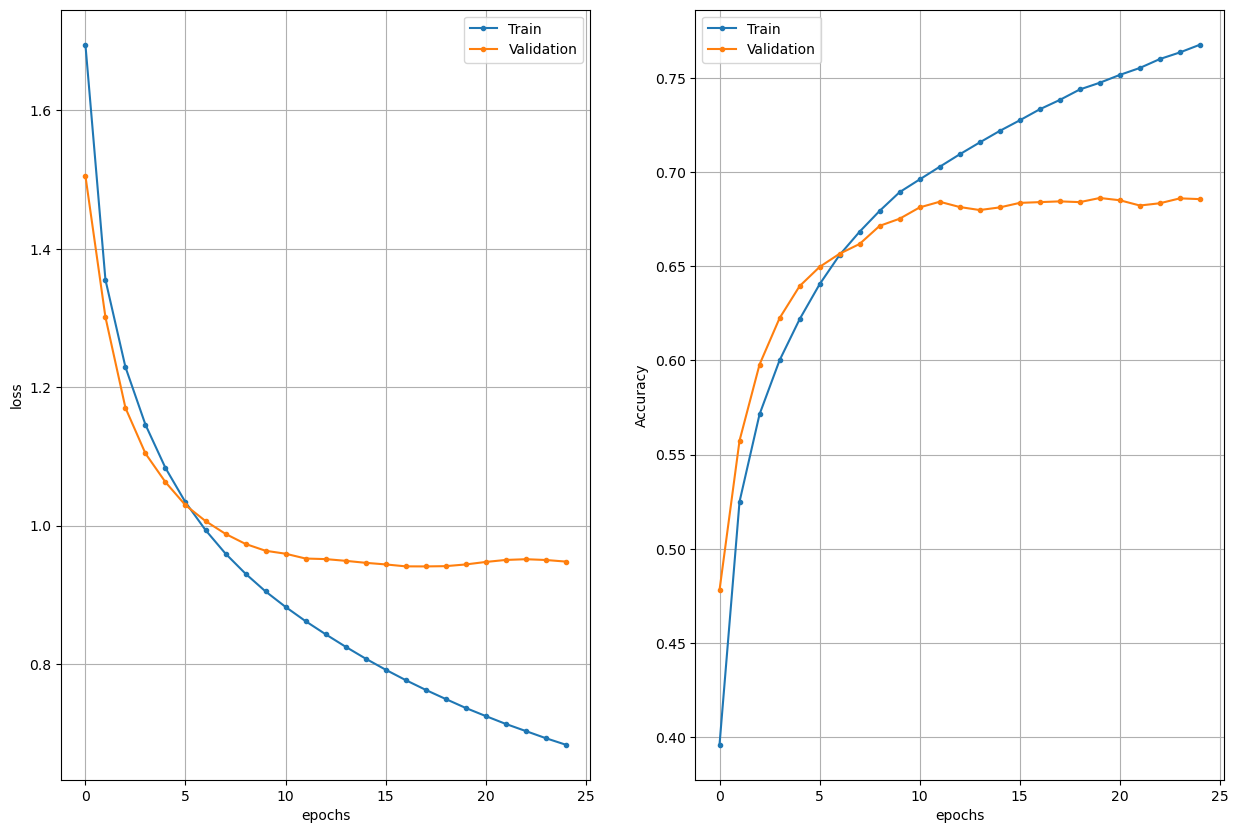

In [46]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [47]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
True [3 8 8 0 6]
Pred [3 1 1 0 6]
Pred [[2.8645238e-03 1.5462339e-02 1.0818656e-02 8.5467696e-01 3.9522178e-03
  6.3045621e-02 9.2182700e-03 2.0720072e-03 3.1969078e-02 5.9203682e-03]
 [2.0411192e-02 5.0321496e-01 6.5732283e-06 1.6250513e-06 4.0233181e-06
  3.1440106e-08 1.0556348e-09 2.3283892e-06 4.7570133e-01 6.5800443e-04]
 [9.6606188e-02 5.6184947e-01 6.8740203e-04 9.5107369e-03 5.3724800e-03
  1.6826339e-04 1.7796327e-04 1.7978066e-03 2.6106569e-01 6.2764011e-02]
 [6.5949786e-01 1.1854069e-01 1.5948100e-01 6.1446163e-03 4.6113286e-02
  1.3967501e-05 6.5025478e-04 2.8867624e-03 6.1090966e-03 5.6246098e-04]
 [3.6167203e-06 6.3393632e-04 1.7846091e-02 1.2927354e-02 2.7882940e-01
  5.6562023e-03 6.8397057e-01 7.3465868e-05 4.4650591e-05 1.4667063e-05]]
(10000, 10)


In [48]:
y_pred = model.predict(x_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1) 

for class_id, class_name in classes.items():
    idx = np.where(y_test_labels == class_id)[0]
    acc = np.mean(y_pred_labels[idx] == y_test_labels[idx])
    print(f"{class_name}: {acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
plane: 0.742
car: 0.860
bird: 0.496
cat: 0.465
deer: 0.699
dog: 0.585
frog: 0.786
horse: 0.758
ship: 0.657
truck: 0.778


In [49]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6826 - loss: 0.9665
Test loss   0.9665423035621643
Test metric 0.6826000213623047


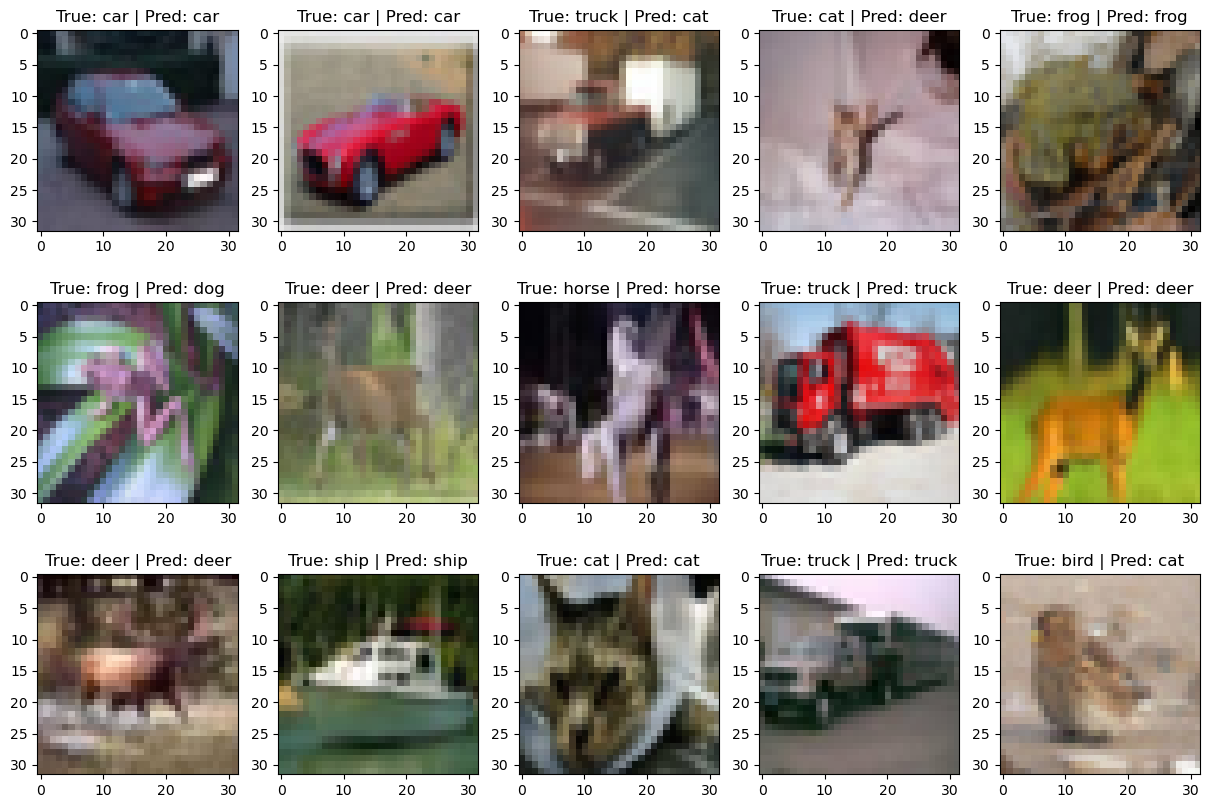

In [51]:
y_pred = np.argmax(y_pred, axis=1)
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?